# Spaceship Titanic 

### Problem description 

The Spaceship Titanic collided with a spacetime anomaly. Although the ship stayed mostly intact, almost half of the passengers were transported to an alternate dimension. The task in this project is to predict whether or not passengers were transported to an alternate dimension. 

Full details can be found on the Kaggle competition page: https://www.kaggle.com/competitions/spaceship-titanic/overview

### Available data and column descriptions

In this project you are provided with a train.csv and test.csv. The data contained in the train.csv is that data that will be used to perform data analysis and build the model from. The test.csv is that data that will be used to assess the performance of the model. 

| Column name  | Description | dtype |
|:--:|--|:--:|
| PassengerId | Unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.  | str |
| HomePlanet | The planet the passenger departed from, typically their planet of permanent residence. | str |
| CryoSleep | Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins. | bool |
| Cabin | The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard. | str |
| Destination | The planet the passenger will be debarking to. | str |
| Age | The age of the passenger. | float |
| VIP | Whether the passenger has paid for special VIP service during the voyage. | bool |
| RoomService, FoodCourt, ShoppingMall, Spa, VRDeck | Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities. | float |
| Name | The first and last names of the passenger. | str |
| Transported | Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.| bool |

# Project steps 

This investigation will include the following: 
- Data loading
- Exploratory data analysis
    - Univariate data analysis 
    - Multivariate data analysis 
    - Cardinality assessment
- Data preprocessing 
    - Preprocessing helper functions 
    - Preprocessing pipelines
- Modelling 
    - Random Forest 
    - Logistic Regression 
    - Support Vector Classification 
    - XGBoost 
    - Decision Tree Classifier 
    - KNeighbours 
    - Voting Classifier 
- Hyperparameter tuning 
    - Random Forest
    - Logistic Regression 
    - XGBoost 
- Final model (Voting Classifier including Random Forest, XGBoost, Logistic Regression)
- Submission creation 
- Leaderboard score

# Data loading

In [1]:
# imports

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns

In [2]:
# load data 

train_df = pd.read_csv(f"{Path.cwd()}/data/train.csv")
test_df = pd.read_csv(f"{Path.cwd()}/data/test.csv")

train_df["CryoSleep"] = train_df.CryoSleep.astype(bool)
test_df["CryoSleep"] = test_df.CryoSleep.astype(bool)

train_df["VIP"] = train_df.VIP.astype(bool)
test_df["VIP"] = test_df.VIP.astype(bool)

# Exploratory data analysis

## Univariate data analysis

In [3]:
# Check for any duplicated rows 
train_duplicates = train_df.duplicated().sum()
test_duplicates = test_df.duplicated().sum()

print("Number of duplicate rows in train data:", train_duplicates)
print("Number of duplicate rows in test data:", test_duplicates)

if train_duplicates != 0 or test_duplicates != 0:
    raise Exception("duplicates alert")

Number of duplicate rows in train data: 0
Number of duplicate rows in test data: 0


In [4]:
train_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [5]:
train_df.shape

(8693, 14)

In [6]:
# missing data values in train data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(3), float64(6), object(5)
memory usage: 772.6+ KB


In [7]:
train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep         0
Cabin           199
Destination     182
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [8]:
test_df.shape

(4277, 13)

In [9]:
# missing data values in test data 
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4277 non-null   bool   
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4277 non-null   bool   
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: bool(2), float64(6), object(5)
memory usage: 376.0+ KB


In [10]:
test_df.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep         0
Cabin           100
Destination      92
Age              91
VIP               0
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

### Initial thoughts: 
- missing values exist in all columns EXCEPT `PassengerId`, `CryoSleep` and `VIP`. 
- `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` 
    - If any non-null values in this row then use mean of values that do exist to fill in the rest 
    - If no non-null values then use the values from other group members 
    - If no to above then use the mean of the column
- `HomePlanet`, `Cabin`, `Destination`
    - Same as others from group 
- `Age`
    - Use mean
- `Name`
    - drop 

In [11]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [12]:
def Cabin_PassengerId_split_and_convert_types(df):
    df[['Cabin_deck', 'Cabin_num', 'Cabin_side']] = df['Cabin'].str.split('/',expand=True)
    df[['PassengerId_group', 'PassengerId_num']] = df['PassengerId'].str.split('_',expand=True)
    df.drop(columns=['Cabin', 'PassengerId'], inplace=True)
    
    df['Cabin_num'] = df['Cabin_num'].astype('float')
    df['PassengerId_group'] = df['PassengerId_group'].astype('float')
    df['PassengerId_num'] = df['PassengerId_num'].astype('float')
    return df 

def drop_name_column(df):
    df.drop(columns=['Name'], inplace=True)
    return df

def combine_luxury_expenses(df):
    df['luxury_expense_sum'] = df.fillna(0)['RoomService'] + df.fillna(0)['FoodCourt'] + df.fillna(0)['ShoppingMall'] + df.fillna(0)['Spa'] + df.fillna(0)['VRDeck']
    return df

train_df = Cabin_PassengerId_split_and_convert_types(train_df)
train_df = drop_name_column(train_df)
train_df = combine_luxury_expenses(train_df)

In [13]:
num_cols = list(train_df.columns[(train_df.dtypes.values == float)])
cat_cols = list(set(train_df.columns) - set(num_cols))
cat_cols.remove('Transported')

## Categorical column analysis 

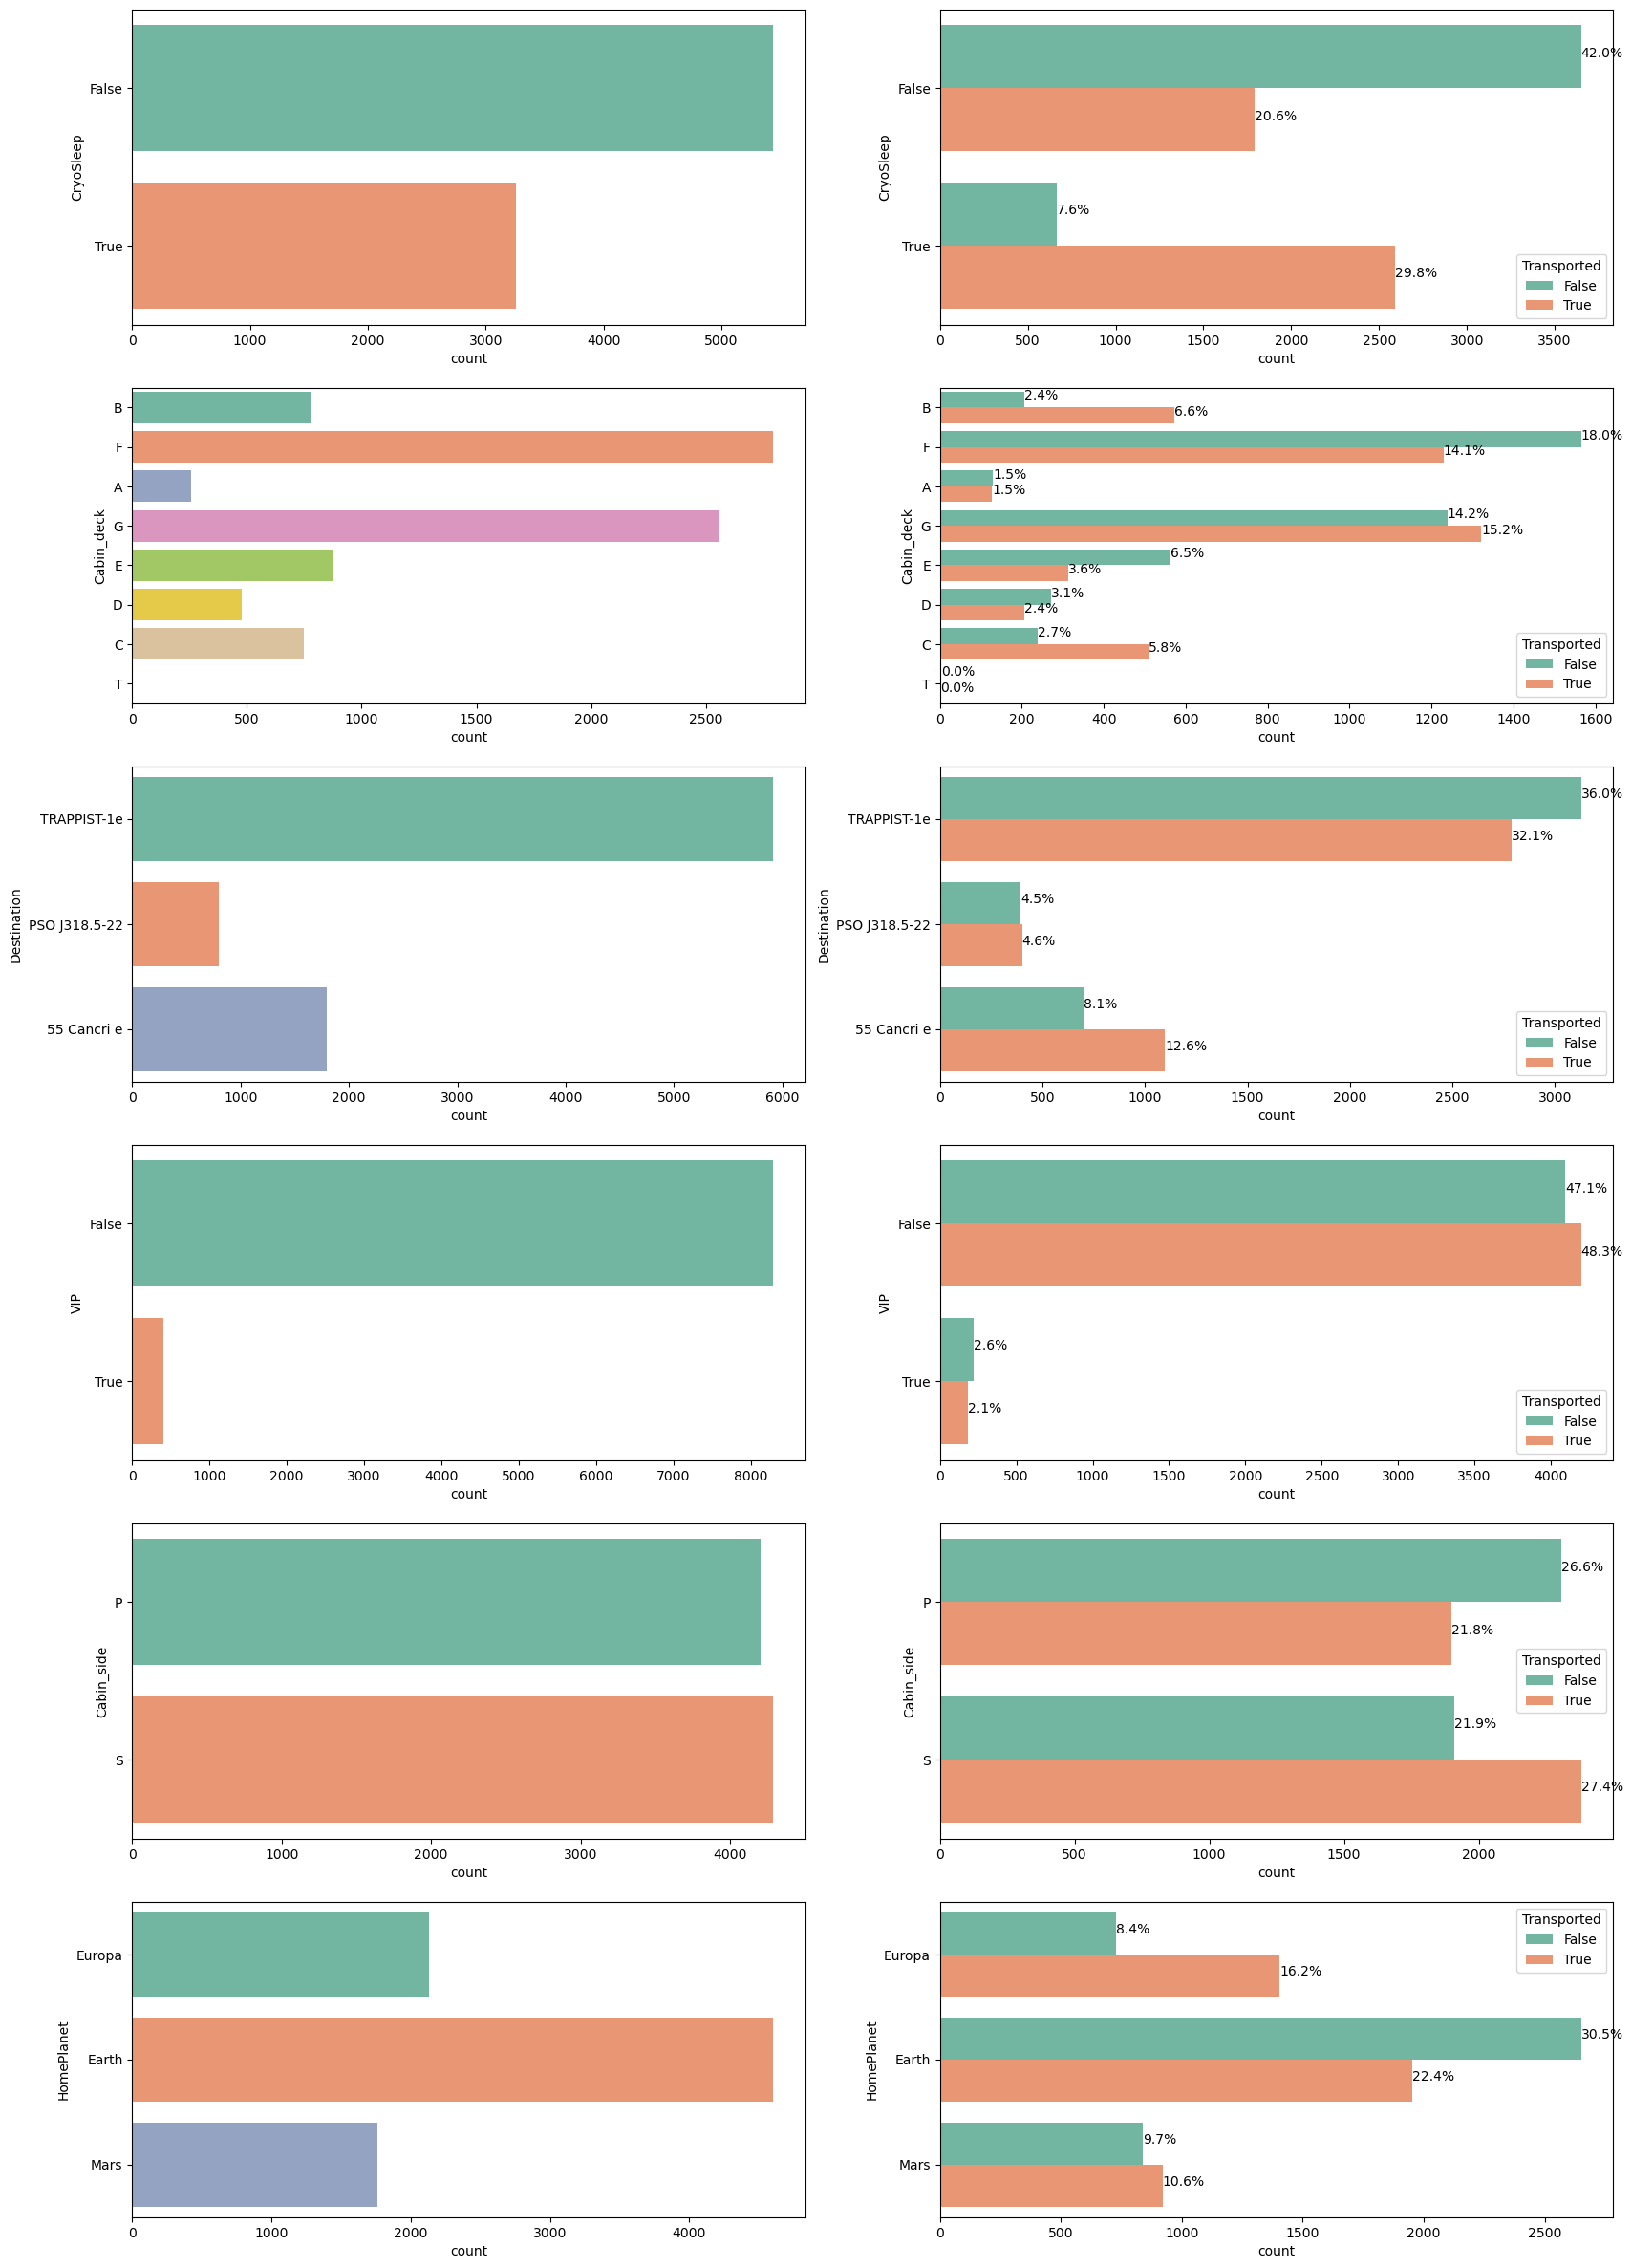

In [14]:
# count plots with transportation information 
fig, axs = plt.subplots(len(cat_cols), 2, figsize=(20, 30))
for i, cat_col in enumerate(cat_cols):
    sns.countplot(data=train_df, y=cat_col, ax=axs[i, 0], palette = "Set2")
    sns.countplot(data=train_df, y=cat_col, ax=axs[i, 1], hue='Transported', palette = "Set2")
    total = len(train_df[cat_col])
    for p in axs[i,1].patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        axs[i,1].annotate(percentage, (x, y))

Observations based on the above plots: 
- `HomePlanet`:
    - Majority of passengers were from earth 
    - 58% of passengers from Earth WERE NOT transported
    - 66% of passengers from Europa WERE transported
- `VIP`:
    - Were not many VIP guests 
- `Destination`:
    - Majority of passengers destinations was to TRAPPIST-1e
    - 60% of passengers from 55 Cancri e WERE transported 
- `Cabin_deck`:
    - Majority of passengers were from cabin deck's B & G
    - 75% of guests from cabin deck B WERE transported 
    - 68% of guests from cabin deck C WERE transported
- `Cabin_side`:
    - Doesn't seem to be much statistical significance here 
- `CryoSleep`:
    - More passengers were not put into cryo sleep
    - 67% of passengers not put into cryosleep WERE NOT transported
    - 79% of passenger put into cryosleep WERE transported

In [15]:
train_df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_deck,Cabin_num,Cabin_side,PassengerId_group,PassengerId_num,luxury_expense_sum
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0.0,P,1.0,1.0,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0.0,S,2.0,1.0,736.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0.0,S,3.0,1.0,10383.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0.0,S,3.0,2.0,5176.0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1.0,S,4.0,1.0,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,98.0,P,9276.0,1.0,8536.0
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,1499.0,S,9278.0,1.0,0.0
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,1500.0,S,9279.0,1.0,1873.0
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E,608.0,S,9280.0,1.0,4637.0


## Numerical column analysis 

In [16]:
train_df[num_cols].describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_num,PassengerId_group,PassengerId_num,luxury_expense_sum
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8494.000000,8693.000000,8693.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,600.367671,4633.389624,1.517773,1440.866329
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189,511.867226,2671.028856,1.054241,2803.045694
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,167.250000,2319.000000,1.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,427.000000,4630.000000,1.000000,716.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000,999.000000,6883.000000,2.000000,1441.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1894.000000,9280.000000,8.000000,35987.000000


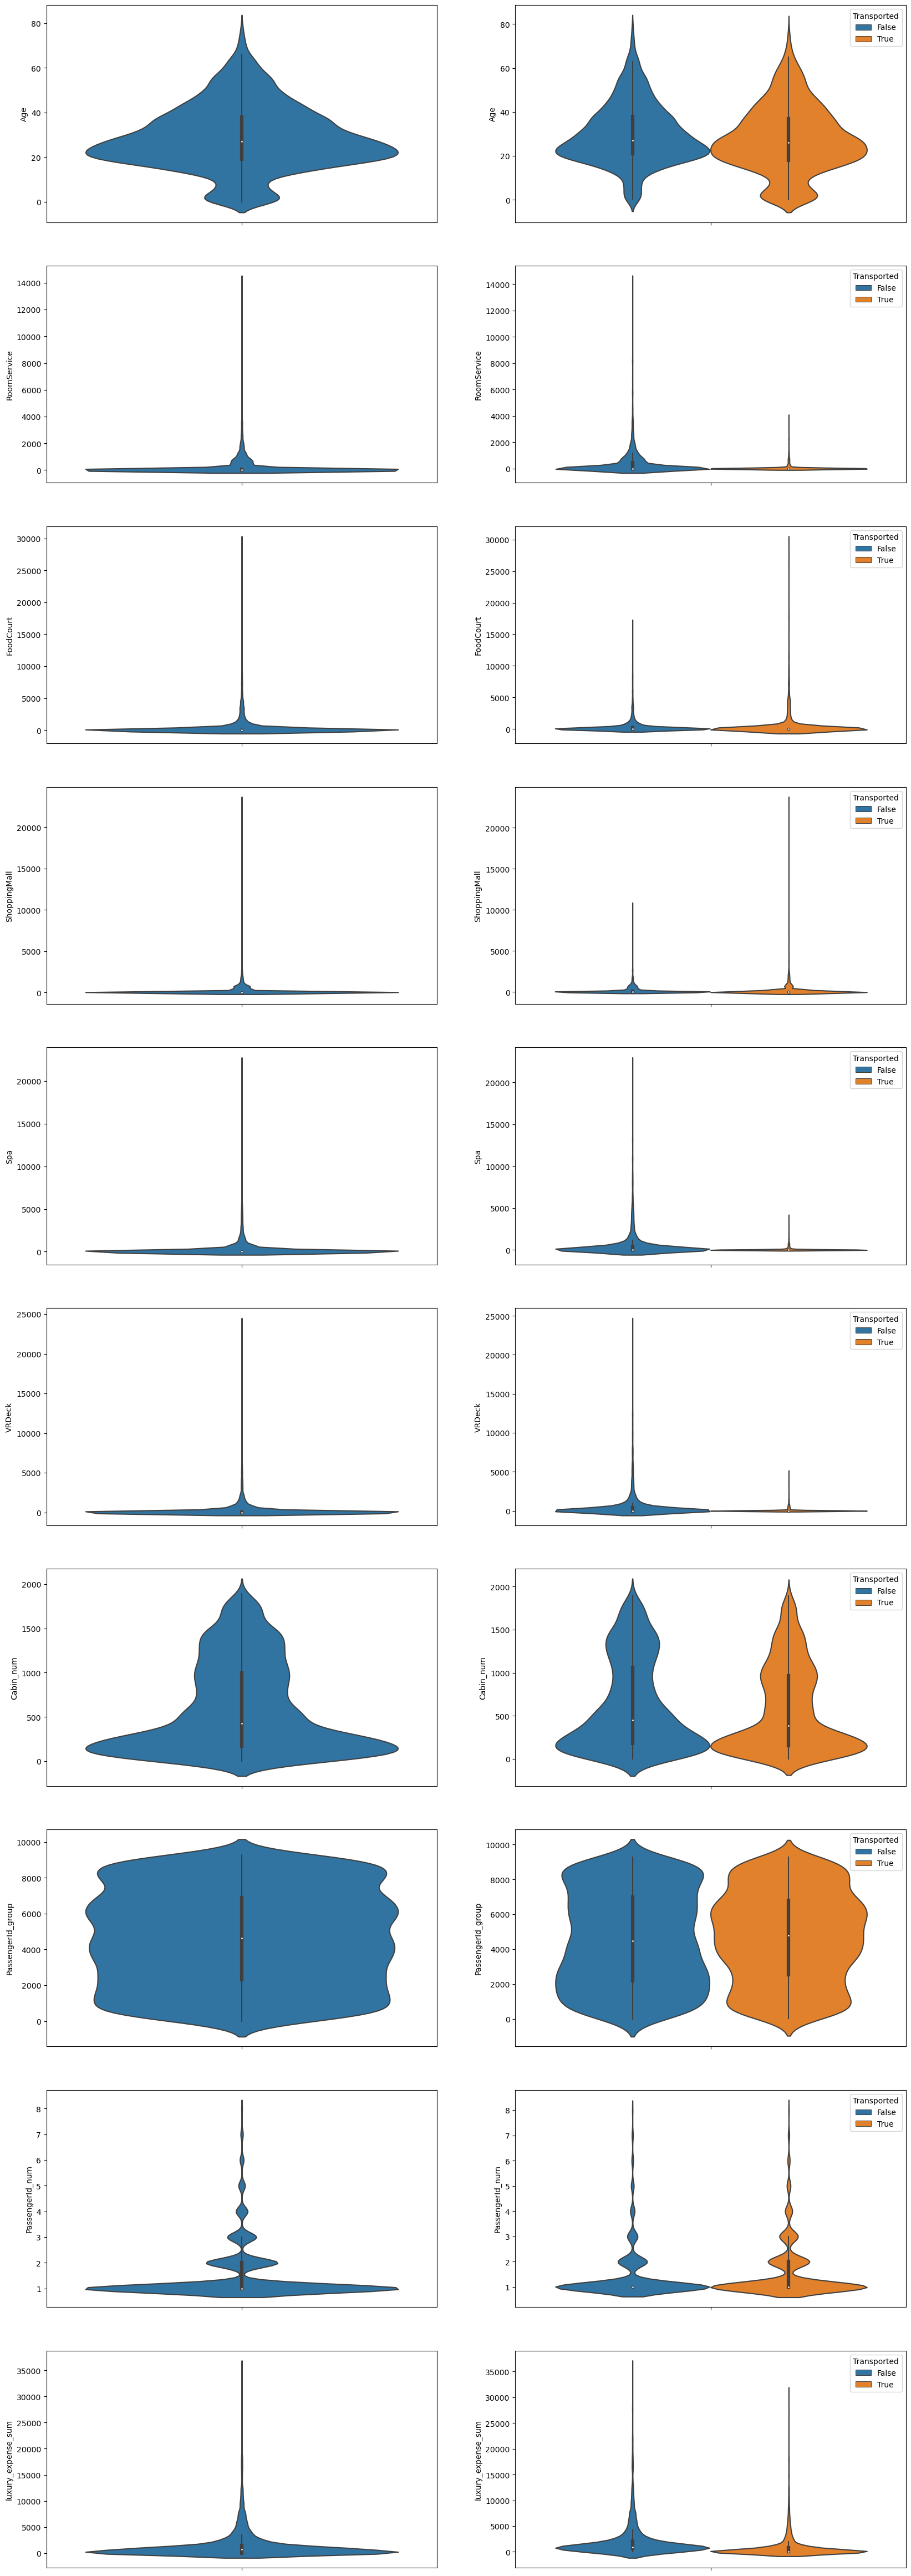

In [17]:
# violin plots and distributions 
num_plot_df = train_df.copy()
num_plot_df[''] = ''
fig, axs = plt.subplots(len(num_cols), 2, figsize=(20, 60))
for i, num_col in enumerate(num_cols): 
    sns.violinplot(data=train_df, y=num_col, ax=axs[i,0])
    sns.violinplot(data=num_plot_df, x='', y=num_col, ax=axs[i,1], hue='Transported', scale='count')
    
    

Observations based on the above plots and describe table:
- Luxury expenses
    - Majority of the data distributions are skewed right
    - Large number of outliers so when filling in nan values probably better to use the median than the mean. Can see this in the mean being double the median in the luxury_expenses_sum. 
- `Age` distributions for transported and not transported look very similar 
    - There are some 0 ages which is interesting - could be babies
    - Mean and median age is approx 27 which is reasonable, would be fine to use mean or median in filling in missing values

<AxesSubplot: >

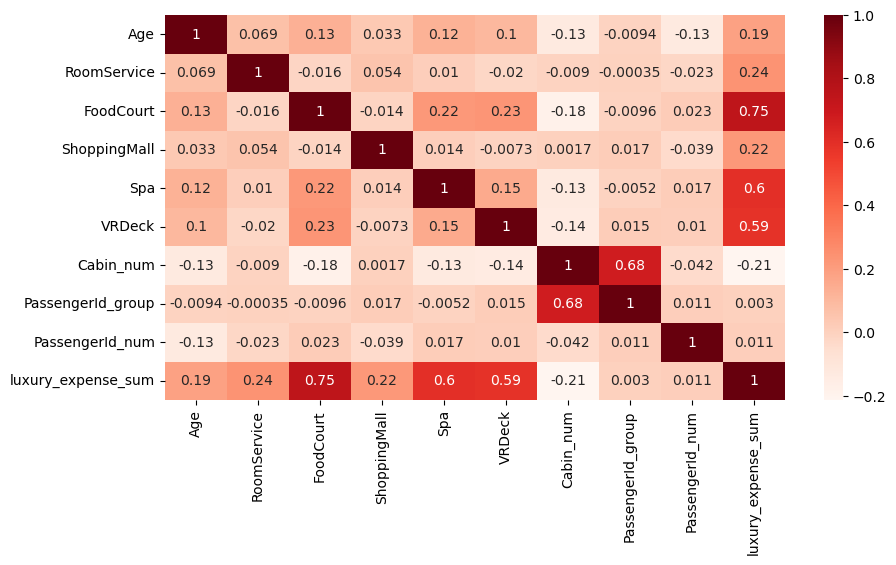

In [18]:
# Assess data correlation 
plt.figure(figsize=(10,5))
sns.heatmap(train_df[num_cols].corr(),cbar=True,annot=True,cmap='Reds')

## Multivariate data analysis

Want to look at the following relationships: 
 - HomePlanets and the Destinations
 - CryoSleep and having luxury_expense_sum above median (happy accident - see observations)
 - CryoSleep and HomePlanets


In [19]:
train_df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_deck,Cabin_num,Cabin_side,PassengerId_group,PassengerId_num,luxury_expense_sum
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0.0,P,1.0,1.0,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0.0,S,2.0,1.0,736.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0.0,S,3.0,1.0,10383.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0.0,S,3.0,2.0,5176.0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1.0,S,4.0,1.0,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,98.0,P,9276.0,1.0,8536.0
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,1499.0,S,9278.0,1.0,0.0
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,1500.0,S,9279.0,1.0,1873.0
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E,608.0,S,9280.0,1.0,4637.0


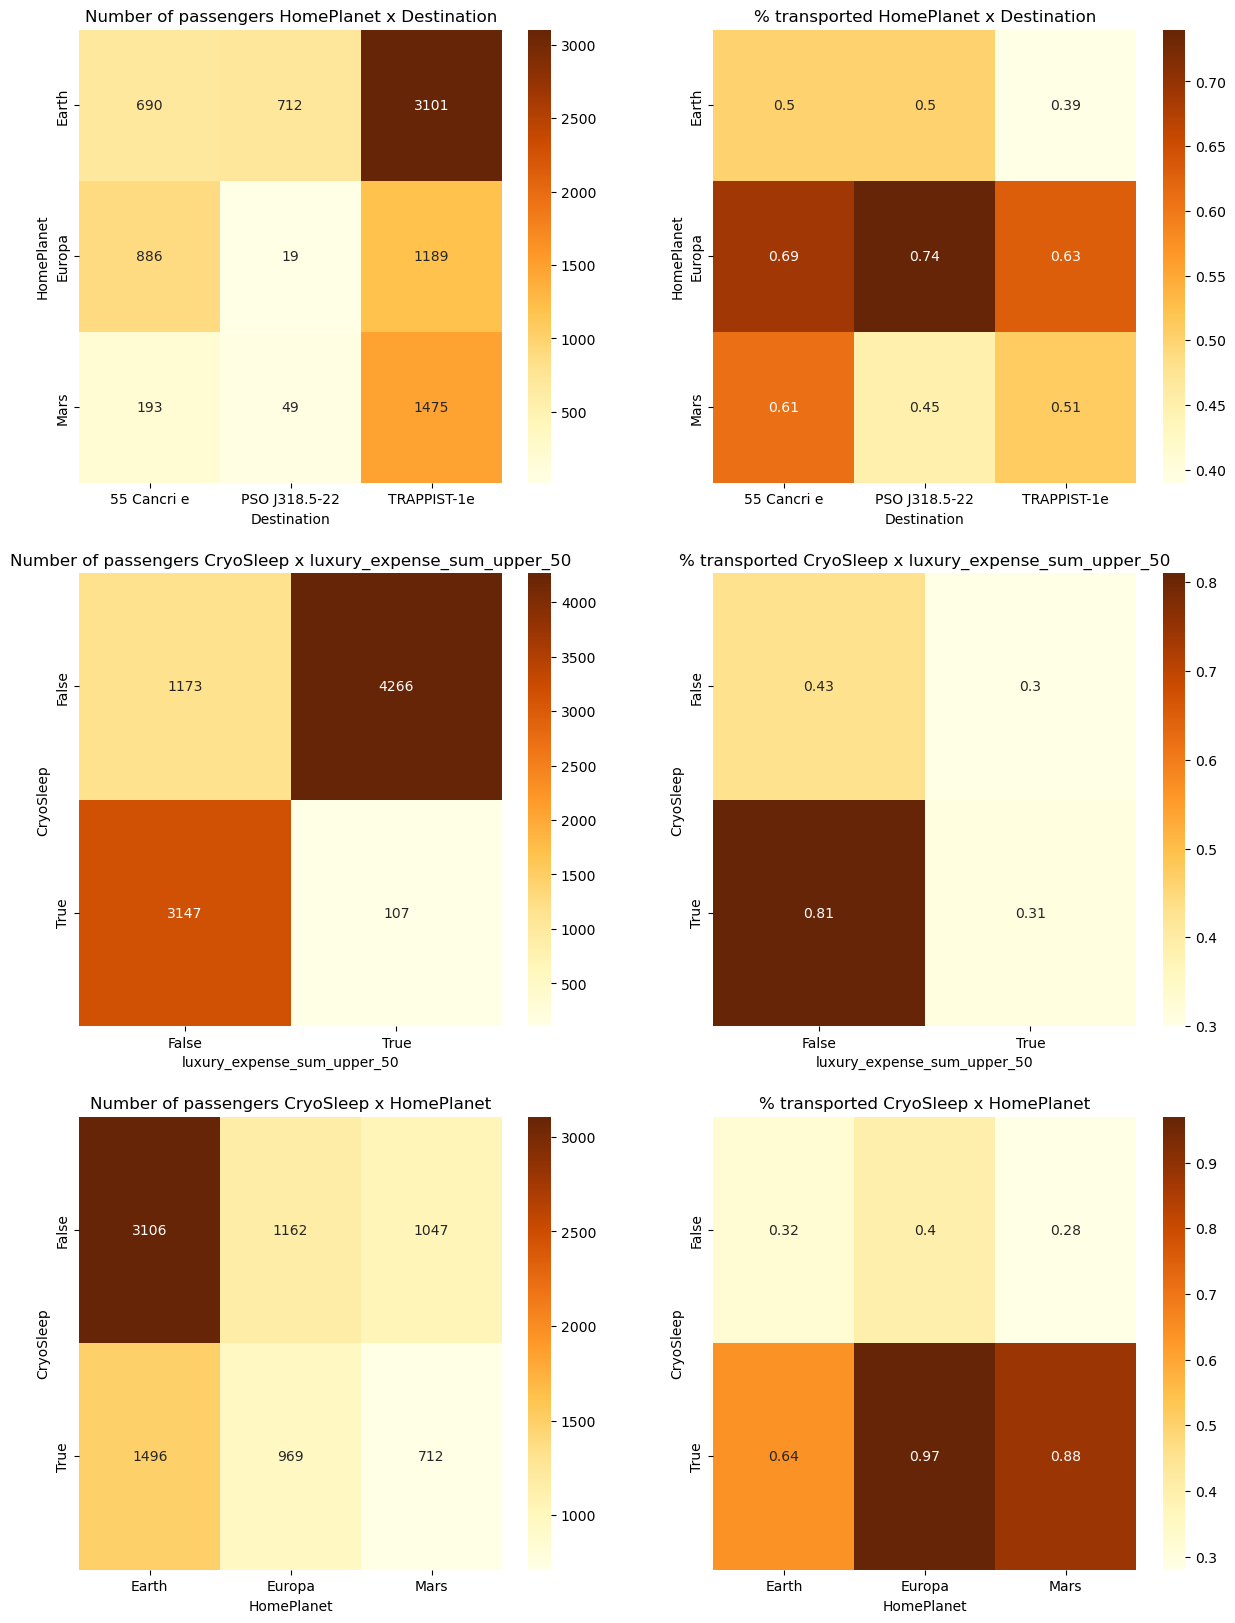

In [20]:
mva_df = train_df.copy()
mva_df['id'] = mva_df.index
mva_df['luxury_expense_sum_upper_50'] = False
mva_df.loc[(mva_df['luxury_expense_sum']>=mva_df['luxury_expense_sum'].median()), 'luxury_expense_sum_upper_50'] = True
fig, axs = plt.subplots(3, 2, figsize=(15, 20))

variable_combos = [('HomePlanet', 'Destination'), ('CryoSleep', 'luxury_expense_sum_upper_50'), ('CryoSleep', 'HomePlanet')]

for i, variable_combo in enumerate(variable_combos):
    v1 = variable_combo[0]
    v2 = variable_combo[1]
    p1 = pd.pivot_table(mva_df, 
                         index = v1, 
                         columns = v2, 
                         values='id',
                         aggfunc ='count')

    p2 = pd.pivot_table(mva_df, 
                         index = v1, 
                         columns = v2, 
                         values='Transported',
                         aggfunc=np.sum)


    sns.heatmap(p1, cbar=True, annot=True, cmap='YlOrBr', fmt='g', ax = axs[i,0])
    axs[i,0].set_title(f'Number of passengers {v1} x {v2}')

    sns.heatmap(round(p2/p1,2), cbar=True, annot=True, cmap='YlOrBr', fmt='g', ax = axs[i,1], )
    axs[i,1].set_title(f'% transported {v1} x {v2}')

Observations: 
 - HomePlanets and the Destinations
     - Large number of passengers with HomePlanet as Earth have a destination of TRAPPIST-1e
     - 70% of passengers from Europa going to SS Cancri e get transported
     - 74% of of passengers travelling from Europa to PSO... get transported but given the few data points (19) in this category it is probable best to ignore this
 - CryoSleep and having luxury_expense_sum in the upper two quartiles
     - Plotting this plot was a happy mistake, thinking about it more I realised that it didn't really make sense that people in CryoSleep could spend anything on luxury amenities. However, 107 passengers spent over the median on luxury amenities, very strange. Will explore this further below. 
     - 81% of passengers in CryoSleep and under median get transported
 - CryoSleep and HomePlanets
     - 97% and 88% of passengers with a HomePlanet of Europa and Mars respectively get transported if they were in CryoSleep.

In [21]:
# investigating the luxury expenses of people in CryoSleep 
cryo_luxury_df = train_df.loc[(train_df["CryoSleep"]==True) & (train_df["luxury_expense_sum"]>0.0)]
num_cryo_and_spending = len(cryo_luxury_df)
num_cryo_sleepers = len(train_df.loc[(train_df["CryoSleep"]==True)])
average_expenses = cryo_luxury_df['luxury_expense_sum'].mean()

print(f"Number of passengers that were in CryoSleep and spent more than 0 on luxury amenities: {num_cryo_and_spending}/{num_cryo_sleepers}")
print(f"Percentage of passengers that were in CryoSleep and spent more than 0 on luxury amenities: {num_cryo_and_spending/num_cryo_sleepers}")
print(f"Average expense of passengers that were in CryoSleep and spent more than 0 on luxury amenities: {average_expenses}")

Number of passengers that were in CryoSleep and spent more than 0 on luxury amenities: 119/3254
Percentage of passengers that were in CryoSleep and spent more than 0 on luxury amenities: 0.03657037492317148
Average expense of passengers that were in CryoSleep and spent more than 0 on luxury amenities: 2495.36974789916


Very surprising: not only passengers in CryoSleep spending money on luxury amenities but on average they are spending more than the average of all passengers 1484. This was approximately 4% of cryo sleepers so I think it's safe to assume that normally a cryo sleeper wouldn't spend money. 

## Cardinality 

<AxesSubplot: >

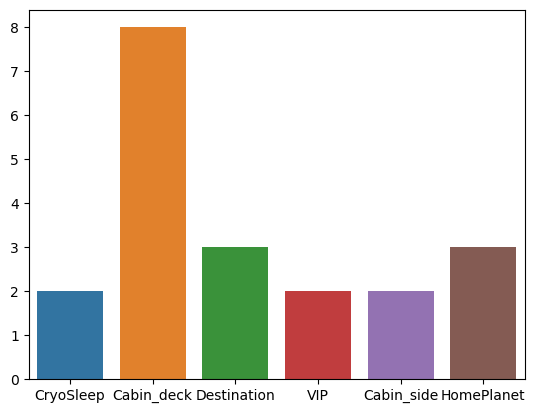

In [22]:
# check cardinality of categorical columns 
cardinality = train_df[cat_cols].apply(pd.Series.nunique)
sns.barplot(x=cardinality.index,y=cardinality.values)

Observations: 
- None of the columns have very high cardinality, should be fine to use one-hot-encoding for all 
- label encoding would also be appropriate especially for the boolean categories such as `VIP` and `CryoSleep`

# Data preprocessing

In [23]:
# imports 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [24]:
def assign_families_to_same(df):
    df["family"] = df['PassengerId_group'].duplicated(keep=False)
    cols_oi = ['Cabin_deck', 'Cabin_num', 'Cabin_side', 'HomePlanet', 'Destination']
    for col in cols_oi:
        cabin_nan_family_df = pd.merge(left = df.loc[df[col].isnull() & df["family"]==True].drop([col], axis=1),
                 right = (df.loc[~df[col].isnull()].groupby('PassengerId_group').first().reset_index())[["PassengerId_group", col]], how="left",
                 on = "PassengerId_group")

        df = pd.merge(left=df,
                       right=cabin_nan_family_df[["PassengerId_group", "PassengerId_num", col]], 
                       how="left",
                       on=["PassengerId_group", "PassengerId_num"])
        df[col] = df[f'{col}_x'].fillna(df[f'{col}_y'])
        df=df.drop([f'{col}_x', f'{col}_y'], axis=1)
    
    df.drop(columns='family',inplace=True)
    return df

def cryo_sleeper_expenses_to_zero_avg_other_nans(df):
    lux_expenses = ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]
    df["nan_total_cost_mean"] = df[["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]].mean(axis=1)
    for l in lux_expenses:
        df.loc[df[l].isnull() & df["CryoSleep"]==True, l] = 0.0
        df[l].fillna(df.nan_total_cost_mean, inplace=True)
    return df


In [25]:
train_df.isnull().sum()

HomePlanet            201
CryoSleep               0
Destination           182
Age                   179
VIP                     0
RoomService           181
FoodCourt             183
ShoppingMall          208
Spa                   183
VRDeck                188
Transported             0
Cabin_deck            199
Cabin_num             199
Cabin_side            199
PassengerId_group       0
PassengerId_num         0
luxury_expense_sum      0
dtype: int64

In [26]:
train_df.dtypes

HomePlanet             object
CryoSleep                bool
Destination            object
Age                   float64
VIP                      bool
RoomService           float64
FoodCourt             float64
ShoppingMall          float64
Spa                   float64
VRDeck                float64
Transported              bool
Cabin_deck             object
Cabin_num             float64
Cabin_side             object
PassengerId_group     float64
PassengerId_num       float64
luxury_expense_sum    float64
dtype: object

In [27]:
# make a list of the categorical and numerical columns that will be used in the modelling steps
cat_cols_bool = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin_deck', 'Cabin_side']
num_cols_special_functions = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
num_cols_mean_simple_imputer = ['Age', 'Cabin_num']

In [28]:
train_df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_deck,Cabin_num,Cabin_side,PassengerId_group,PassengerId_num,luxury_expense_sum
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0.0,P,1.0,1.0,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0.0,S,2.0,1.0,736.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0.0,S,3.0,1.0,10383.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0.0,S,3.0,2.0,5176.0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1.0,S,4.0,1.0,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,98.0,P,9276.0,1.0,8536.0
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,1499.0,S,9278.0,1.0,0.0
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,1500.0,S,9279.0,1.0,1873.0
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E,608.0,S,9280.0,1.0,4637.0


## Creating preprocessing pipeline steps 

In [29]:
pipeline_dt_simple = Pipeline(steps = [('Cabin_PassengerId_split', FunctionTransformer(Cabin_PassengerId_split_and_convert_types)),
                                        ('drop_name', FunctionTransformer(drop_name_column))                          
                                       ])

pipeline_fill_some_nans = Pipeline(steps = [('assign_families_to_same_cabin', FunctionTransformer(assign_families_to_same)),
                                            ('cryo_sleeper_expenses_to_zero_avg_other_nans', FunctionTransformer(cryo_sleeper_expenses_to_zero_avg_other_nans)),
                                           ])

pipeline_cat_cols_dt = Pipeline(steps = [('simple_impute_most_frequent', SimpleImputer(missing_values=np.nan,
                                                                                      strategy='most_frequent')),
                                         ('one_hot_encoding', OneHotEncoder()),
                                        ])

pipeline_num_cols_mean = Pipeline(steps = [('simple_impute_mean', SimpleImputer(missing_values=np.nan,
                                                                               strategy='mean'))])

pipeline_rest_num_cols = Pipeline(steps = [('simple_impute_0', SimpleImputer(missing_values=np.nan,
                                                                               fill_value=0, strategy='constant'))])

col_transformer = ColumnTransformer(transformers=[('cat_cols',pipeline_cat_cols_dt,cat_cols),
                                                  ('pipeline_num_cols_mean',pipeline_num_cols_mean,num_cols_mean_simple_imputer), 
                                                  ('Numerical2',pipeline_rest_num_cols, num_cols_special_functions)])


In [30]:
# reload data 
train_df = pd.read_csv(f"{Path.cwd()}/data/train.csv")
test_df = pd.read_csv(f"{Path.cwd()}/data/test.csv")

train_df["CryoSleep"] = train_df.CryoSleep.astype(bool)
test_df["CryoSleep"] = test_df.CryoSleep.astype(bool)

train_df["VIP"] = train_df.VIP.astype(bool)
test_df["VIP"] = test_df.VIP.astype(bool)

In [31]:
X = train_df.drop(columns='Transported')
y = train_df.Transported
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=.2, random_state=5)

# Modelling 

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

import warnings
warnings.filterwarnings('ignore')

## Random Forest

cross-validation: [0.79074447 0.81589537 0.80382294 0.79657603 0.78247734 0.81067472
 0.81369587]
cross-validation mean: 0.801983820633483


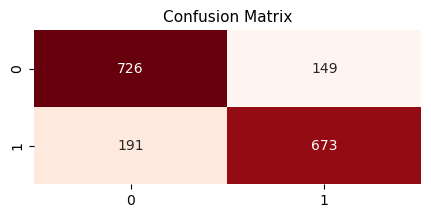

In [33]:
kf = KFold(n_splits = 7)
clf_rf = Pipeline([('simple_transform',pipeline_dt_simple),
                ('fill_some_nans', pipeline_fill_some_nans),
                ('column_transforms', col_transformer), 
                ('rf', RandomForestClassifier(random_state = 1))])
cv = cross_val_score(clf_rf,X_train.copy(),y_train.copy(),cv=kf)
print(f"cross-validation: {cv}")
print(f"cross-validation mean: {cv.mean()}")

# fit model to training data 
clf_rf.fit(X_train.copy(), y_train.copy())

# make predictions
y_pred = clf_rf.predict(X_valid.copy())
plt.figure(figsize=(5,2))
sns.heatmap(confusion_matrix(y_valid,y_pred), annot=True, fmt='d', cmap='Reds',cbar=False).set_title('Confusion Matrix', fontsize=11)
plt.show()

## Logistic Regrssion 

cross-validation: [0.78269618 0.80985915 0.80885312 0.78449144 0.78147029 0.80463243
 0.77844914]
cross-validation mean: 0.7929216791180111


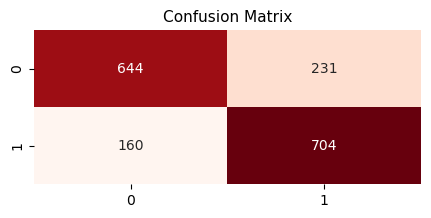

In [34]:
kf = KFold(n_splits = 7)
clf_lr = Pipeline([('simple_transform',pipeline_dt_simple),
                ('fill_some_nans', pipeline_fill_some_nans),
                ('column_transforms', col_transformer), 
                ('lr', LogisticRegression(max_iter = 2000))])

cv = cross_val_score(clf_lr, X_train.copy(),y_train.copy(),cv=kf)
print(f"cross-validation: {cv}")
print(f"cross-validation mean: {cv.mean()}")

# fit model to training data 
clf_lr.fit(X_train.copy(), y_train.copy())

# make predictions
y_pred = clf_lr.predict(X_valid.copy())
plt.figure(figsize=(5,2))
sns.heatmap(confusion_matrix(y_valid,y_pred), annot=True, fmt='d', cmap='Reds',cbar=False).set_title('Confusion Matrix', fontsize=11)
plt.show()

## Support Vector Classifier

cross-validation: [0.78470825 0.79879276 0.78772636 0.79254783 0.78046324 0.78952669
 0.78650554]
cross-validation mean: 0.7886100953295662


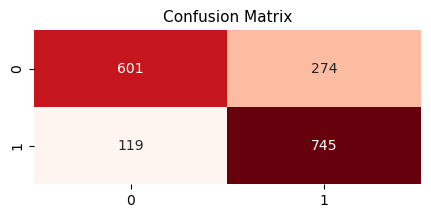

In [35]:
kf = KFold(n_splits = 7)
clf_svc = Pipeline([('simple_transform',pipeline_dt_simple),
                ('fill_some_nans', pipeline_fill_some_nans),
                ('column_transforms', col_transformer), 
                ('svc', SVC(random_state=5, probability=True))]) 

cv = cross_val_score(clf_svc, X_train.copy(), y_train.copy(), cv=kf)
print(f"cross-validation: {cv}")
print(f"cross-validation mean: {cv.mean()}")

# fit model to training data 
clf_svc.fit(X_train.copy(), y_train.copy())

# make predictions
y_pred = clf_svc.predict(X_valid.copy())
plt.figure(figsize=(5,2))
sns.heatmap(confusion_matrix(y_valid,y_pred), annot=True, fmt='d', cmap='Reds',cbar=False).set_title('Confusion Matrix', fontsize=11)
plt.show()

## XGBoost 

cross-validation: [0.79778672 0.79577465 0.80784708 0.78952669 0.80563948 0.83182276
 0.78650554]
cross-validation mean: 0.802128987418975


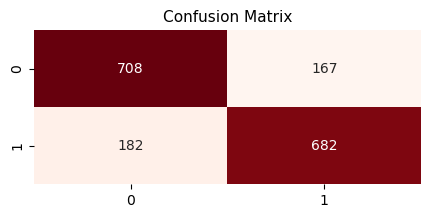

In [36]:
kf = KFold(n_splits = 7)
clf_xgb = Pipeline([('simple_transform',pipeline_dt_simple),
                ('fill_some_nans', pipeline_fill_some_nans),
                ('column_transforms', col_transformer), 
                ('xgb', XGBClassifier(random_state = 1))])
cv = cross_val_score(clf_xgb, X_train.copy(), y_train.copy(), cv=kf)
print(f"cross-validation: {cv}")
print(f"cross-validation mean: {cv.mean()}")

# fit model to training data 
clf_xgb.fit(X_train.copy(), y_train.copy())

# make predictions
y_pred = clf_xgb.predict(X_valid.copy())
plt.figure(figsize=(5,2))
sns.heatmap(confusion_matrix(y_valid,y_pred), annot=True, fmt='d', cmap='Reds',cbar=False).set_title('Confusion Matrix', fontsize=11)
plt.show()

# Decision tree classifier 

cross-validation: [0.7334004  0.75251509 0.74849095 0.73716012 0.74219537 0.75830816
 0.73413897]
cross-validation mean: 0.7437441509942985


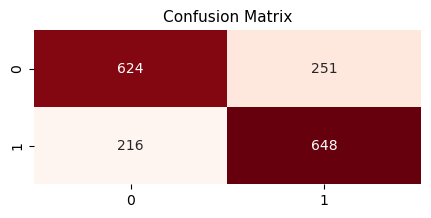

In [37]:
kf = KFold(n_splits = 7)
clf_dt = Pipeline([('simple_transform',pipeline_dt_simple),
                ('fill_some_nans', pipeline_fill_some_nans),
                ('column_transforms', col_transformer), 
                ('dt', tree.DecisionTreeClassifier(random_state = 1))])
cv = cross_val_score(clf_dt, X_train.copy(), y_train.copy(), cv=kf)
print(f"cross-validation: {cv}")
print(f"cross-validation mean: {cv.mean()}")

# fit model to training data 
clf_dt.fit(X_train.copy(), y_train.copy())

# make predictions
y_pred = clf_dt.predict(X_valid.copy())
plt.figure(figsize=(5,2))
sns.heatmap(confusion_matrix(y_valid,y_pred), annot=True, fmt='d', cmap='Reds',cbar=False).set_title('Confusion Matrix', fontsize=11)
plt.show()

## KNeighbours

cross-validation: [0.78470825 0.79778672 0.78269618 0.77442095 0.77442095 0.76837865
 0.7693857 ]
cross-validation mean: 0.7788281986553184


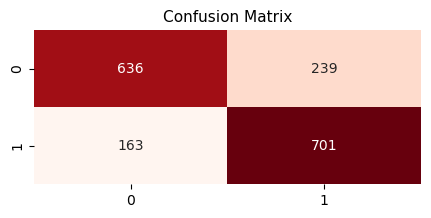

In [38]:
kf = KFold(n_splits = 7)
clf_kn = Pipeline([('simple_transform',pipeline_dt_simple),
                ('fill_some_nans', pipeline_fill_some_nans),
                ('column_transforms', col_transformer), 
                ('kn', KNeighborsClassifier(n_neighbors=9,p=2,weights='uniform'))])
cv = cross_val_score(clf_kn, X_train.copy(), y_train.copy(), cv=kf)
print(f"cross-validation: {cv}")
print(f"cross-validation mean: {cv.mean()}")

# fit model to training data 
clf_kn.fit(X_train.copy(), y_train.copy())

# make predictions
y_pred = clf_kn.predict(X_valid.copy())
plt.figure(figsize=(5,2))
sns.heatmap(confusion_matrix(y_valid,y_pred), annot=True, fmt='d', cmap='Reds',cbar=False).set_title('Confusion Matrix', fontsize=11)
plt.show()

# Ensemble 

cross-validation: [0.79376258 0.81488934 0.8138833  0.79758308 0.80463243 0.82175227
 0.80765358]
cross-validation mean: 0.8077366515305326


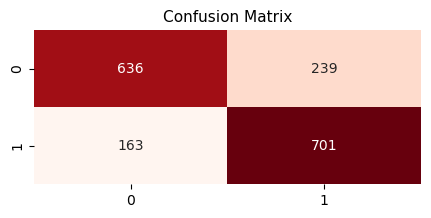

In [39]:
# random forest and xgboost
kf = KFold(n_splits = 7)
clf_vc = Pipeline([('simple_transform',pipeline_dt_simple),
                ('fill_some_nans', pipeline_fill_some_nans),
                ('column_transforms', col_transformer), 
                ('VotingClassifier', VotingClassifier(estimators = [('rf',RandomForestClassifier(random_state = 1)),('xgb',XGBClassifier(random_state = 1))], 
                                                      voting = 'soft'))])
cv = cross_val_score(clf_vc, X_train.copy(), y_train.copy(), cv=kf)
print(f"cross-validation: {cv}")
print(f"cross-validation mean: {cv.mean()}")

# fit model to training data 
clf_vc.fit(X_train.copy(), y_train.copy())

# make predictions
y_pred = clf_kn.predict(X_valid.copy())
plt.figure(figsize=(5,2))
sns.heatmap(confusion_matrix(y_valid,y_pred), annot=True, fmt='d', cmap='Reds',cbar=False).set_title('Confusion Matrix', fontsize=11)
plt.show()

cross-validation: [0.79979879 0.81690141 0.81790744 0.79859013 0.80060423 0.82175227
 0.80563948]
cross-validation mean: 0.8087419640848978


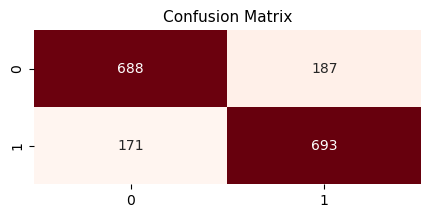

In [40]:
kf = KFold(n_splits = 7)
clf_vc = Pipeline([('simple_transform',pipeline_dt_simple),
                ('fill_some_nans', pipeline_fill_some_nans),
                ('column_transforms', col_transformer), 
                ('VotingClassifier', VotingClassifier(estimators = [
                    ('rf',RandomForestClassifier(random_state = 1)),
                    ('xgb',XGBClassifier(random_state = 1)),
                    ('lr',LogisticRegression(max_iter = 2000, random_state=5)),
                    ], 
                                                      voting = 'soft'))])
cv = cross_val_score(clf_vc, X_train.copy(), y_train.copy(), cv=kf)
print(f"cross-validation: {cv}")
print(f"cross-validation mean: {cv.mean()}")

# fit model to training data 
clf_vc.fit(X_train.copy(), y_train.copy())

# make predictions
y_pred = clf_vc.predict(X_valid.copy())
plt.figure(figsize=(5,2))
sns.heatmap(confusion_matrix(y_valid,y_pred), annot=True, fmt='d', cmap='Reds',cbar=False).set_title('Confusion Matrix', fontsize=11)
plt.show()

cross-validation: [0.8028169  0.80482897 0.82796781 0.80161128 0.79758308 0.82779456
 0.80161128]
cross-validation mean: 0.8091734119289179


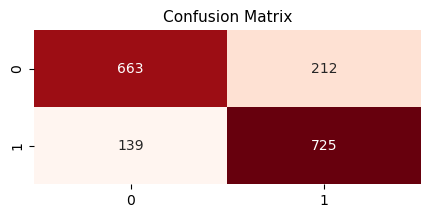

In [41]:
kf = KFold(n_splits = 7)
clf_vc = Pipeline([('simple_transform',pipeline_dt_simple),
                ('fill_some_nans', pipeline_fill_some_nans),
                ('column_transforms', col_transformer), 
                ('VotingClassifier', VotingClassifier(estimators = [
                    ('rf',RandomForestClassifier(random_state = 1)),
                    ('xgb',XGBClassifier(random_state = 1)),
                    ('lr',LogisticRegression(max_iter = 2000, random_state=5)),
                    ('svc', SVC(random_state=5, probability=True))
                    ], 
                                                      voting = 'soft'))])
cv = cross_val_score(clf_vc, X_train.copy(), y_train.copy(), cv=kf)
print(f"cross-validation: {cv}")
print(f"cross-validation mean: {cv.mean()}")

# fit model to training data 
clf_vc.fit(X_train.copy(), y_train.copy())

# make predictions
y_pred = clf_vc.predict(X_valid.copy())
plt.figure(figsize=(5,2))
sns.heatmap(confusion_matrix(y_valid,y_pred), annot=True, fmt='d', cmap='Reds',cbar=False).set_title('Confusion Matrix', fontsize=11)
plt.show()

cross-validation: [0.81086519 0.81086519 0.82193159 0.79556898 0.79053374 0.80664653
 0.79758308]
cross-validation mean: 0.8048563283021392


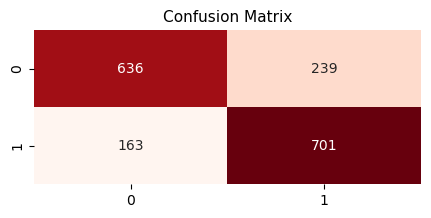

In [42]:
kf = KFold(n_splits = 7)
clf_vc = Pipeline([('simple_transform',pipeline_dt_simple),
                ('fill_some_nans', pipeline_fill_some_nans),
                ('column_transforms', col_transformer), 
                ('VotingClassifier', VotingClassifier(estimators = [
                    ('rf',RandomForestClassifier(random_state = 1)),
                    ('xgb',XGBClassifier(random_state = 1)),
                    ('lr',LogisticRegression(max_iter = 2000)),
                    ('knn', KNeighborsClassifier(n_neighbors=9,p=2,weights='uniform')),
                    ], 
                                                      voting = 'soft'))])
cv = cross_val_score(clf_vc, X_train.copy(), y_train.copy(), cv=kf)
print(f"cross-validation: {cv}")
print(f"cross-validation mean: {cv.mean()}")

# fit model to training data 
clf_vc.fit(X_train.copy(), y_train.copy())

# make predictions
y_pred = clf_kn.predict(X_valid.copy())
plt.figure(figsize=(5,2))
sns.heatmap(confusion_matrix(y_valid,y_pred), annot=True, fmt='d', cmap='Reds',cbar=False).set_title('Confusion Matrix', fontsize=11)
plt.show()

## Hyperparameter tuning 

Going to parameter tune random forest, xgboost and logistic regression for the ensemble.

NB only used RandomizedSearchCV. Next steps would be to use the GridSearchCV after narrowing down the parameters with the RandomizedSearchCV. 

In [43]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

In [44]:
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

### Random forest hyperparameter tuning

In [45]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1900, num = 10)]
max_depth = [int(x) for x in np.linspace(start=10, stop=110, num = 11)]
max_depth.append(None)

random_grid =  {'n_estimators': n_estimators,
               'criterion':['gini','entropy'],
                                  'bootstrap': [True, False],
                                  'max_depth': max_depth,
                                  'max_features': ['auto', 'sqrt'],
                                  'min_samples_leaf': [1, 2, 4],
                                  'min_samples_split': [2, 5, 10]}

clf_rf = Pipeline([('simple_transform',pipeline_dt_simple),
                ('fill_some_nans', pipeline_fill_some_nans),
                ('column_transforms', col_transformer), 
                ('rf', RandomizedSearchCV(RandomForestClassifier(random_state = 1),
                                    param_distributions = random_grid, 
                                    n_iter = 100,
                                    cv=5, 
                                    verbose=True,
                                    n_jobs=-1, 
                                    random_state = 5
                                   ))])
                                  
best_clf_rf = clf_rf.fit(X_train.copy(), y_train.copy())
clf_performance(best_clf_rf['rf'],'Random Forest')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Random Forest
Best Score: 0.8078802579790947
Best Parameters: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 60, 'criterion': 'entropy', 'bootstrap': True}


### Logistic regression hyperparameter tuning

In [46]:
n_estimators = [int(x) for x in np.linspace(start = 300, stop = 3900, num = 10)]

random_grid = {'max_iter' : n_estimators,
              'penalty' : ['l1', 'l2', 'elasticnet', None],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear', 'newton-cholesky']}

clf_lr = Pipeline([('simple_transform',pipeline_dt_simple),
                ('fill_some_nans', pipeline_fill_some_nans),
                ('column_transforms', col_transformer), 
                ('lr', RandomizedSearchCV(LogisticRegression(random_state=5),
                                    param_distributions = random_grid, 
                                    n_iter = 200,
                                    cv=6, 
                                    verbose=True,
                                    n_jobs=-1,
                                    random_state = 5
                                   ))])
                                  
best_clf_lr = clf_lr.fit(X_train.copy(), y_train.copy())
clf_performance(best_clf_lr['lr'],'Logistic Regression')

Fitting 6 folds for each of 200 candidates, totalling 1200 fits
Logistic Regression
Best Score: 0.7986770204199023
Best Parameters: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 1500, 'C': 0.012742749857031334}


### XGBoost hyperparameter tuning

In [47]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1900, num = 10)]
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]

random_grid = {'n_estimators' : n_estimators,
              'learning_rate' : learning_rate,}

clf_xgb = Pipeline([('simple_transform',pipeline_dt_simple),
                ('fill_some_nans', pipeline_fill_some_nans),
                ('column_transforms', col_transformer), 
                ('xgb', RandomizedSearchCV(XGBClassifier(random_state=5),
                                    param_distributions = random_grid, 
                                    n_iter = 100,
                                    cv=3, 
                                    verbose=True,
                                    n_jobs=-1,
                                    random_state = 5
                                   ))])
                                  
best_clf_xgb = clf_xgb.fit(X_train.copy(), y_train.copy())
clf_performance(best_clf_xgb['xgb'],'XGBoost')

Fitting 3 folds for each of 60 candidates, totalling 180 fits
XGBoost
Best Score: 0.8087431693989071
Best Parameters: {'n_estimators': 500, 'learning_rate': 0.01}


# Final model and submission 

cross-validation: [0.81086519 0.80985915 0.8249497  0.79758308 0.80261833 0.82376636
 0.80060423]
cross-validation mean: 0.8100351497562558


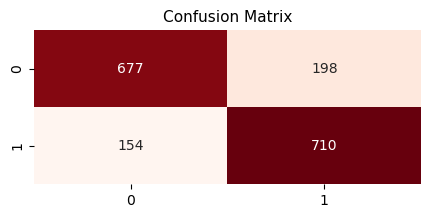

In [48]:
# random state not set in below models in run that gave highest score, however score with below is 0.8036 
# also found model performance was better using default params of the XGBClassifier 
kf = KFold(n_splits = 7)
clf_vc = Pipeline([('simple_transform',pipeline_dt_simple),
                ('fill_some_nans', pipeline_fill_some_nans),
                ('column_transforms', col_transformer), 
                ('VotingClassifier', VotingClassifier(estimators = [
                    ('rf',RandomForestClassifier(random_state = 5, 
                                                 n_estimators= 1700, 
                                                 min_samples_split = 2, 
                                                 min_samples_leaf = 4, 
                                                 max_features = 'sqrt', 
                                                 max_depth = 70, # None
                                                 criterion = 'entropy', 
                                                 bootstrap = True)), # False
                    ('xgb',XGBClassifier(random_state = 5)), 
                                         # learning_rate=0.01, 
                                         # n_estimators=500)),
                    ('lr',LogisticRegression(random_state = 1, 
                                             solver = 'liblinear', 
                                             penalty = 'l1', 
                                             max_iter = 1500, 
                                             C = 0.012742749857031334)),
                    ], 
                                                      voting = 'soft'))])
cv = cross_val_score(clf_vc, X_train.copy(), y_train.copy(), cv=kf)
print(f"cross-validation: {cv}")
print(f"cross-validation mean: {cv.mean()}")

# fit model to training data 
clf_vc.fit(X_train.copy(), y_train.copy())

# make predictions
y_pred = clf_vc.predict(X_valid.copy())
plt.figure(figsize=(5,2))
sns.heatmap(confusion_matrix(y_valid,y_pred), annot=True, fmt='d', cmap='Reds',cbar=False).set_title('Confusion Matrix', fontsize=11)
plt.show()

In [49]:
y_test_pred = clf_vc.predict(test_df.copy()).astype(bool)
basic_submission = {'PassengerId': test_df.PassengerId, 'Transported': y_test_pred}
base_submission = pd.DataFrame(data=basic_submission)
base_submission.to_csv('submission.csv', index=False)

# Leaderboard score 

| Submission | Score |
|--|--|
| base | 0.79167 |
| final | 0.80406 |